In [18]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json

In [19]:
!gdown https://drive.google.com/uc?id=1D0FXMiM2DPlBtwG2Y3DT8_IISBs5BVej -O cleaned_reviews_v2.csv
!gdown https://drive.google.com/uc?id=1zB8slvCMhtW9IfjM5fKL80ZXzAT8_VBL -O cleaned_steam_db_v2.csv
!gdown https://drive.google.com/uc?id=11HGJxuYeVrnkavjASNkSEiqjU1Q0Rwx5 -O genre_dict.json
!gdown https://drive.google.com/uc?id=1MCwYLKTBF5LH0hC0JTFd2eUPAWU7cKv8 -O cleaned_bridge.csv

Downloading...
From (original): https://drive.google.com/uc?id=1D0FXMiM2DPlBtwG2Y3DT8_IISBs5BVej
From (redirected): https://drive.google.com/uc?id=1D0FXMiM2DPlBtwG2Y3DT8_IISBs5BVej&confirm=t&uuid=46c6b708-6345-4435-a78b-ed73d7a11a25
To: /content/cleaned_reviews_v2.csv
100% 206M/206M [00:01<00:00, 153MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zB8slvCMhtW9IfjM5fKL80ZXzAT8_VBL
To: /content/cleaned_steam_db_v2.csv
100% 21.8M/21.8M [00:00<00:00, 163MB/s]
Downloading...
From: https://drive.google.com/uc?id=11HGJxuYeVrnkavjASNkSEiqjU1Q0Rwx5
To: /content/genre_dict.json
100% 650/650 [00:00<00:00, 1.95MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MCwYLKTBF5LH0hC0JTFd2eUPAWU7cKv8
To: /content/cleaned_bridge.csv
100% 3.77M/3.77M [00:00<00:00, 152MB/s]


In [20]:
df = pd.read_csv("cleaned_steam_db_v2.csv")
df

,type,name,steam_appid,required_age,is_free,genres,platform_windows,platform_mac,platform_linux,release_year,...,lang_ru,lang_ar,tool,nsfw,film,release_distance_value,initial_price_usd,final_price_usd,memory_gb,storage_gb
0,demo,Pin Them Demo,1904630,0,True,[],True,False,False,2023.0,...,False,False,False,False,False,2,0.000000,0.000000,NaN,NaN
1,game,Al-Qadim: The Genie's Curse,1904640,0,False,"[1, 3]",True,False,False,2022.0,...,False,False,False,False,False,2,3.204000,3.204000,0.5,2.0
2,game,Dungeons & Dragons - Stronghold: Kingdom Simul...,1904650,0,False,"[28, 2]",True,False,False,2022.0,...,False,False,False,False,False,2,3.204000,3.204000,0.5,2.0
3,game,Chapel 3-D: The Ascent,1904680,0,False,"[1, 23]",True,False,False,NaN,...,False,False,False,False,False,0,0.000000,0.000000,1.0,0.0
4,game,VTuber Gallery : Anime Pose,1904690,0,True,"[51, 53, 55, 57, 59, 70]",True,False,False,2022.0,...,False,False,True,False,False,2,0.000000,0.000000,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95028,dlc,Monster Hunter World: Iceborne - 追加饰物「金辉心·水晶」,1265473,0,False,[1],True,False,False,2020.0,...,True,True,False,False,False,3,1.022192,1.022192,8.0,52.0
95029,dlc,Monster Hunter World: Iceborne - 追加饰物「白金辉心·黄玉」,1265474,0,False,[1],True,False,False,2020.0,...,True,True,False,False,False,3,1.022192,1.022192,8.0,52.0
95030,dlc,Monster Hunter World: Iceborne - 追加饰物「白金辉心·樱晶」,1265476,0,False,[1],True,False,False,2020.0,...,True,True,False,False,False,3,1.022192,1.022192,8.0,52.0
95031,game,Fights in Tight Spaces,1265820,0,False,"[1, 2]",True,False,False,2021.0,...,True,False,False,False,False,2,8.811000,8.811000,4.0,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95033 entries, 0 to 95032
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type                    95033 non-null  object 
 1   name                    95033 non-null  object 
 2   steam_appid             95033 non-null  int64  
 3   required_age            95033 non-null  int64  
 4   is_free                 95033 non-null  bool   
 5   genres                  95033 non-null  object 
 6   platform_windows        95033 non-null  bool   
 7   platform_mac            95033 non-null  bool   
 8   platform_linux          95033 non-null  bool   
 9   release_year            84290 non-null  float64
 10  release_quarter         82811 non-null  float64
 11  coming_soon             95033 non-null  bool   
 12  package_number          95033 non-null  int64  
 13  discount_percent        95033 non-null  float64
 14  developers_amount       95033 non-null

In [22]:
df["required_age"]

0        0
1        0
2        0
3        0
4        0
        ..
95028    0
95029    0
95030    0
95031    0
95032    0
Name: required_age, Length: 95033, dtype: int64

#**Making questions**#

**1. What platform has the most support for games?**

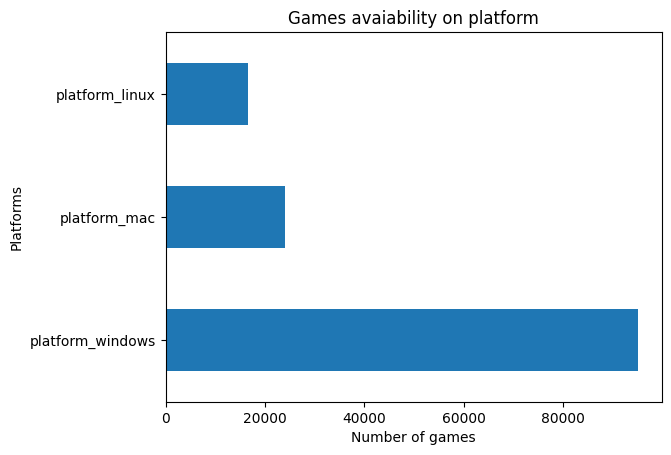

In [23]:
#visualize which platform is the most popular for games
sums = df[['platform_windows', 'platform_mac', 'platform_linux']].sum()

sums.plot(kind='barh')
plt.xlabel('Number of games')
plt.ylabel('Platforms')
plt.title('Games avaiability on platform')
plt.show()

- The bar chart shows the amount of games supported natively on three operating systems.
- Windows is the has the most games that support it natively.
- It should be noted that Linux has a compatibility layer called Proton which helps most games run on Linux without native support.

**2. Age requirement trend for games?**

In [24]:
age = df['required_age'].unique()
age

array([ 0, 18, 16, 12, 13, 17, 10, 15,  7,  3,  5, 14,  6, 11,  1,  4])

In [25]:
df['required_age'].value_counts()

required_age
0     93117
18     1022
16      418
17      177
12      128
13       59
15       43
14       25
7        17
3         9
10        7
11        5
6         3
5         1
1         1
4         1
Name: count, dtype: int64

In [26]:
df.loc[df["required_age"] == 171, "required_age"] = 0

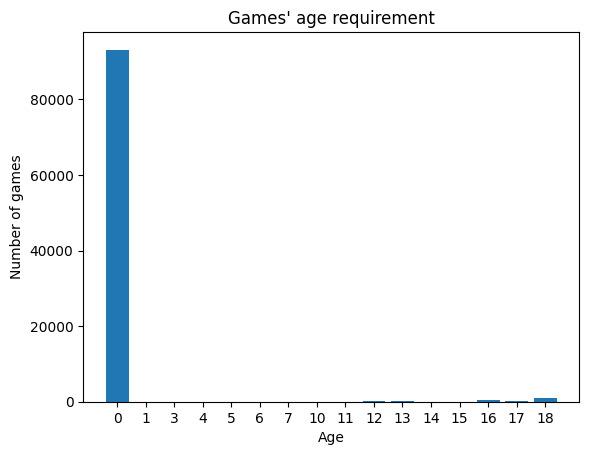

In [27]:
age = df.groupby("required_age")["steam_appid"].count().reset_index()
plt.bar(age["required_age"].astype(str), age["steam_appid"])
plt.xlabel('Age')
plt.ylabel('Number of games')
plt.title("Games' age requirement")
plt.show()

- We can see that an overwhelming of game has no age requirement.
- This means most games are designed to be accessed by players of every age.

Excluding 0 age group(Everyone).

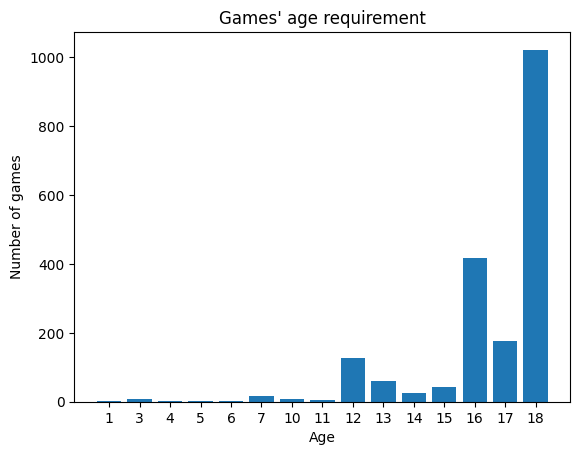

In [28]:
age = df[df["required_age"] > 0].groupby("required_age")["steam_appid"].count().reset_index()
plt.bar(age["required_age"].astype(str) , age["steam_appid"])
plt.xlabel('Age')
plt.ylabel('Number of games')
plt.title("Games' age requirement")
plt.show()

- We can see that games for 18 age group is the highest.
- Games for 16 and above are the significantly higher than the rest of the age group.




In [29]:
def group_age(x):
  if x < 15:
    return "All age"
  elif x < 18:
    return "Teen"
  else:
    return "Adult"

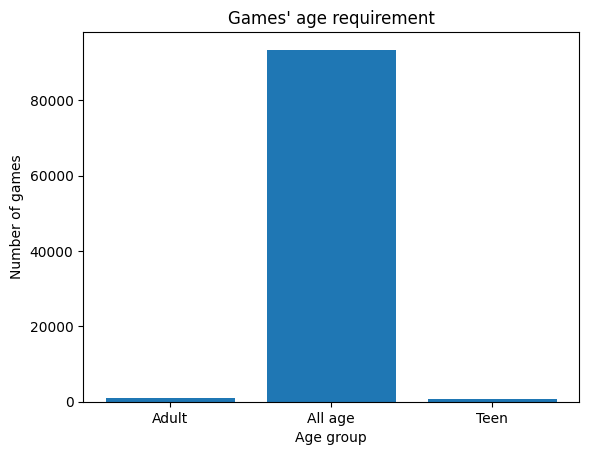

In [30]:
#age = df.loc[:, 'required_age'].sort_values().astype(str)
df["group_age"] = df["required_age"].apply(group_age)
age = df.groupby("group_age")["steam_appid"].count().reset_index()
plt.bar(age["group_age"], age["steam_appid"])
#age.plot(kind='bar')
#sns.barplot(age)
plt.xlabel('Age group')
plt.ylabel('Number of games')
plt.title("Games' age requirement")
plt.show()

- This bar graph gives us an overview of the distribution of games divided into 3 categories: Adult, All age and Teen

**3. Does the storage of games correlates to the monetary value of the game?**

<Axes: xlabel='initial_price_usd', ylabel='storage_gb'>

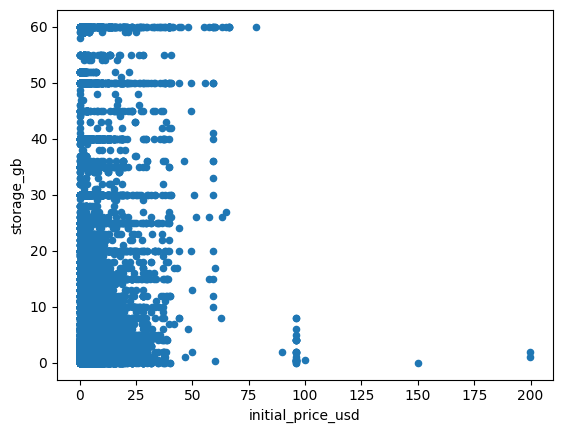

In [31]:
df.plot.scatter('initial_price_usd', 'storage_gb')

- There is no trend to support the idea that the more money a game costs, the higher in storage it requires.

**4. What genres are the most published on Steam?**

In [44]:
genre_dict = {"1": "Action", "2": "Strategy", "3": "RPG", "4": "Casual", "9": "Racing", "18": "Sports", "23": "Indie", "25": "Adventure", "28": "Simulation",
              "29": "Massively Multiplayer", "37": "Free to Play", "50": "Accounting", "51": "Animation & Modeling", "52": "Audio Production",
              "53": "Design & Illustration", "54": "Education", "55": "Photo Editing", "56": "Software Training", "57": "Utilities", "58": "Video Production",
              "59": "Web Publishing", "60": "Game Development", "70": "Early Access", "71": "Sexual Content", "72": "Nudity", "73": "Violent", "74": "Gore",
              "80": "Movie", "81": "Documentary", "82": "Episodic", "83": "Short", "84": "Tutorial"}

df['genres'] = df['genres'].astype(str).apply(lambda x: json.loads(x))

for genre_number, genre_name in genre_dict.items():
    genre_number = int(genre_number)
    df[genre_name] = df['genres'].apply(lambda x: genre_number in x)

genre_counts = df[[genre_name for genre_name in genre_dict.values()]].sum()
print(genre_counts)

Action                   33716
Strategy                 17126
RPG                      17328
Casual                   29228
Racing                    3059
Sports                    3424
Indie                    51214
Adventure                28972
Simulation               18819
Massively Multiplayer     2409
Free to Play              6818
Accounting                  11
Animation & Modeling       535
Audio Production           342
Design & Illustration     1561
Education                  570
Photo Editing              159
Software Training          301
Utilities                  948
Video Production           304
Web Publishing            1121
Game Development           499
Early Access              5936
Sexual Content             111
Nudity                      92
Violent                    291
Gore                       183
Movie                      111
Documentary                 11
Episodic                     7
Short                        8
Tutorial                     3
dtype: i

<ipython-input-48-4f66da7ffed7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette='viridis')


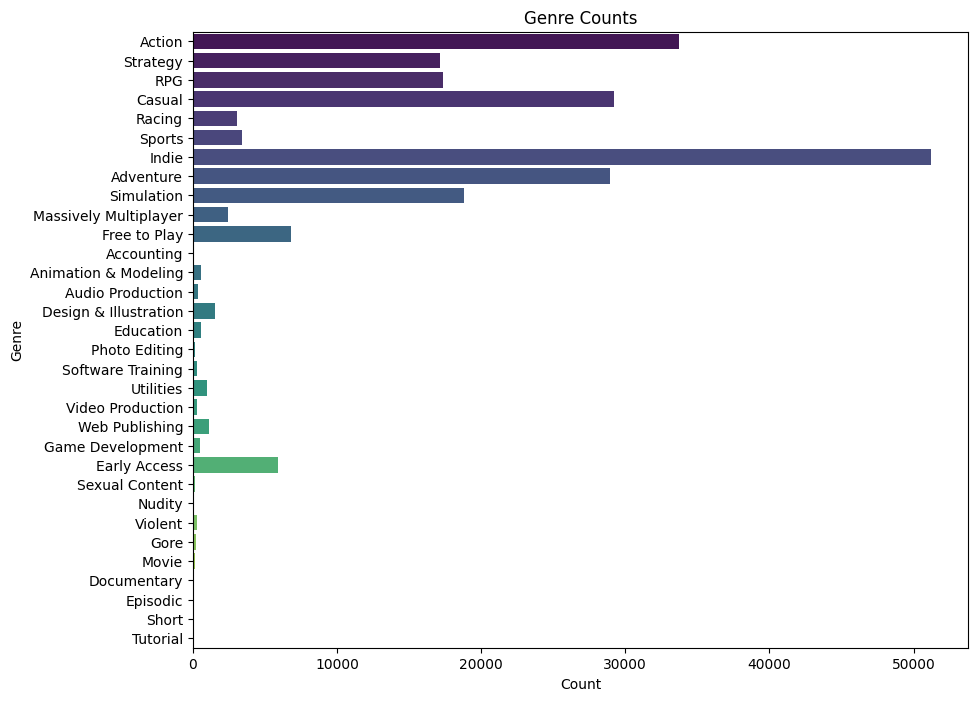

In [48]:
# Convert genre_counts Series to DataFrame and reset index
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette='viridis')

plt.title('Genre Counts')
plt.xlabel('Count')
plt.ylabel('Genre')

plt.show()

- The indie genre dominates all other genres.
- Gore has the least amount of games.
- Weird genres(Accounting, Documentary, Episodic, Short and Tutorial) has close to no entries.
- Ai thấy thêm được gì thêm nha.


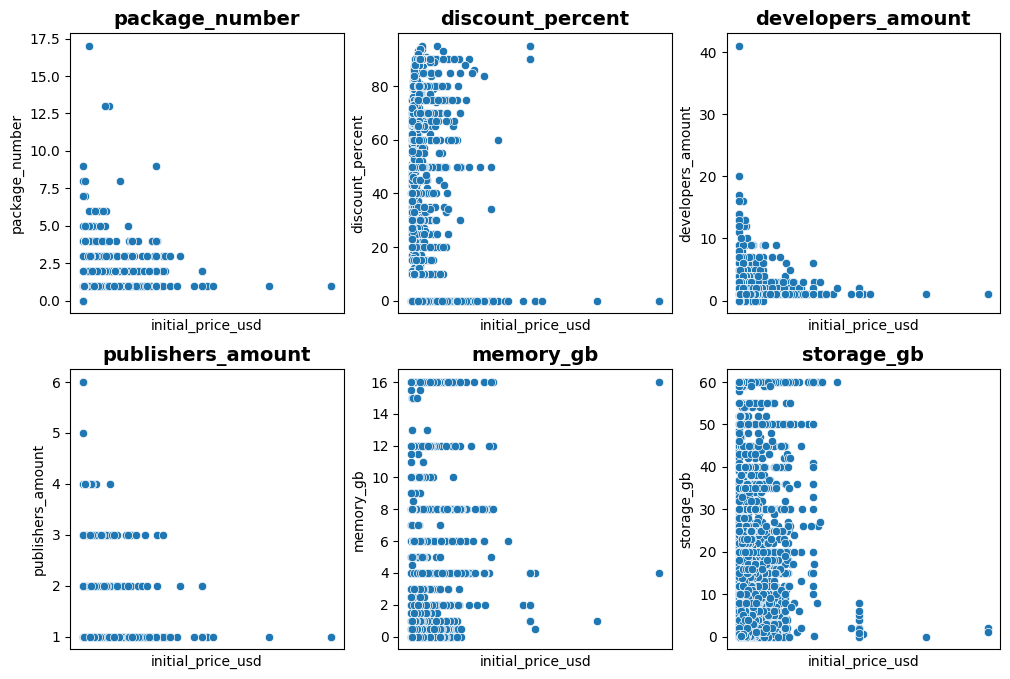

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

cols = ["package_number", "discount_percent", "developers_amount", "publishers_amount", 'memory_gb', 'storage_gb']
for i in range(6):
  sns.scatterplot(df, x="initial_price_usd", y=cols[i], ax=ax[i // 3, i % 3])
  ax[i // 3, i % 3].set_xticks([])
  ax[i // 3, i % 3].set_title(cols[i], fontsize=14, fontweight="bold")

plt.show()

<Axes: >

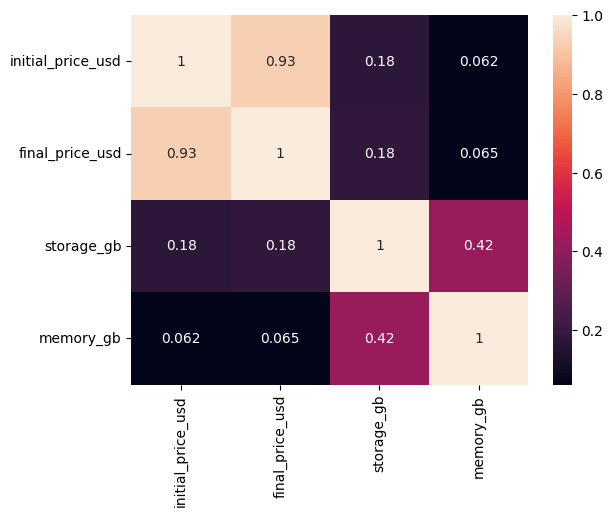

In [34]:
sns.heatmap(df[["initial_price_usd", "final_price_usd", "storage_gb", "memory_gb"]].corr(), annot=True)